<a href="https://colab.research.google.com/github/brasilemnumeros/dados/blob/main/igp-m/IGP-M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IGP-M Mensal
Analisar a evolução histórica da taxa IGP-M nos últimos 30 anos, incluindo a coleta, carregamento, pré-processamento e visualização dos dados.**negrito**

## Coleta de dados

### Subtask:
Buscar uma fonte confiável de dados históricos do IGP-M.


**Reasoning**:
Search for reliable data sources for the Selic rate history and identify the access method and data format.



In [1]:
%pip install python-bcb

## Coleta de dados em partes

### Subtask:
Coletar os dados históricos da taxa Selic em múltiplos períodos de 5 anos usando o pacote `python-bcb`.


In [2]:
from bcb import sgs
import pandas as pd
from datetime import datetime, timedelta

# Define the end date as today
end_date = datetime.now()

# Define the start date for the last 30 years
start_date_overall = end_date - timedelta(days=30 * 365) # Approximate 30 years

# List to store dataframes for each 5-year period
dfs_igpm = []

# Define the period length in years
period_years = 5

# Loop through 5-year periods backwards from the end date
current_end_date = end_date
while current_end_date > start_date_overall:
    current_start_date = max(start_date_overall, current_end_date - timedelta(days=period_years * 365))

    print(f"Attempting to retrieve data from {current_start_date.strftime('%Y-%m-%d')} to {current_end_date.strftime('%Y-%m-%d')}")

    try:
        # Use the bcb.sgs.get() function to retrieve the series data for the current period
        df_period = sgs.get(('igpm', 189), start=current_start_date.strftime('%Y-%m-%d'), end=current_end_date.strftime('%Y-%m-%d'))

        if not df_period.empty:
            print(f"Data retrieved for the period: {current_start_date.strftime('%Y-%m-%d')} to {current_end_date.strftime('%Y-%m-%d')}")
            dfs_igpm.append(df_period)
        else:
            print(f"No data retrieved for the period: {current_start_date.strftime('%Y-%m-%d')} to {current_end_date.strftime('%Y-%m-%d')}")

    except Exception as e:
        print(f"An error occurred while retrieving data for the period {current_start_date.strftime('%Y-%m-%d')} to {current_end_date.strftime('%Y-%m-%d')}: {e}")

    # Set the end date for the next period
    current_end_date = current_start_date - timedelta(days=1) # Start the next period the day before

print(f"Collected {len(dfs_igpm)} dataframes for different periods.")

Attempting to retrieve data from 2020-08-11 to 2025-08-10
Data retrieved for the period: 2020-08-11 to 2025-08-10
Attempting to retrieve data from 2015-08-12 to 2020-08-10
Data retrieved for the period: 2015-08-12 to 2020-08-10
Attempting to retrieve data from 2010-08-12 to 2015-08-11
Data retrieved for the period: 2010-08-12 to 2015-08-11
Attempting to retrieve data from 2005-08-12 to 2010-08-11
Data retrieved for the period: 2005-08-12 to 2010-08-11
Attempting to retrieve data from 2000-08-12 to 2005-08-11
Data retrieved for the period: 2000-08-12 to 2005-08-11
Attempting to retrieve data from 1995-08-18 to 2000-08-11
Data retrieved for the period: 1995-08-18 to 2000-08-11
Collected 6 dataframes for different periods.


## Combinar os dados coletados

### Subtask:
Juntar os DataFrames de cada período em um único DataFrame.

In [3]:
# Check if the list of dataframes is not empty
if dfs_igpm:
    # Concatenate all dataframes in the list
    # sort_index() is important to ensure the combined dataframe is in chronological order
    df_igpm_combined = pd.concat(dfs_igpm).sort_index()

    print("DataFrames combinados com sucesso!")
    print("\nInformações do DataFrame combinado:")
    df_igpm_combined.info()

    print("\nPrimeiras 5 linhas do DataFrame combinado:")
    display(df_igpm_combined.head())

    print("\nÚltimas 5 linhas do DataFrame combinado:")
    display(df_igpm_combined.tail())

else:
    print("A lista de DataFrames está vazia. Não há dados para combinar.")
    df_igpm_combined = None

DataFrames combinados com sucesso!

Informações do DataFrame combinado:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1995-08-01 to 2025-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   igpm    365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB

Primeiras 5 linhas do DataFrame combinado:


,igpm
Date,
1995-08-01,2.20
1995-09-01,-0.71
1995-10-01,0.52
1995-11-01,1.20
1995-12-01,0.71



Últimas 5 linhas do DataFrame combinado:


,igpm
Date,
2025-03-01,-0.34
2025-04-01,0.24
2025-05-01,-0.49
2025-06-01,-1.67
2025-07-01,-0.77


## Pré-processamento e Consolidação dos dados

### Subtask:
Limpar, formatar e consolidar os dados para uma granularidade menor (por exemplo, mensal ou anual).

In [12]:
# Check if the combined DataFrame exists
if df_igpm_combined is None:
    print("Error: O DataFrame combinado não foi carregado na etapa anterior.")
else:
    # Check data types and missing values before consolidation
    print("Informações do DataFrame combinado antes da consolidação:")
    df_igpm_combined.info()

    print("\nValores ausentes antes da consolidação:")
    print(df_igpm_combined.isnull().sum())

    # Rename the column for clarity before consolidation if not already done (should be 'igpm' from bcb)
    # df_igpm_combined.rename(columns={'igpm': 'IGP-M (%)'}, inplace=True) # This line caused the error

    # If already renamed in a previous attempt, this will do nothing, which is fine.

    # Consolidate the data to a monthly frequency
    # We'll take the mean of the daily rates within each month as the monthly rate
    df_igpm_combined = df_igpm_combined.resample('M').mean()

    # Rename the Series using the .name attribute
    df_igpm_combined.name = 'IGP-M (%)'


    print("\nInformações do DataFrame mensal consolidado:")
    df_igpm_combined.info()

    print("\nPrimeiras 5 linhas do DataFrame mensal consolidado:")
    display(df_igpm_combined.head())

    print("\nÚltimas 5 linhas do DataFrame mensal consolidado:")
    display(df_igpm_combined.tail())

Informações do DataFrame combinado antes da consolidação:
<class 'pandas.core.series.Series'>
DatetimeIndex: 360 entries, 1995-08-31 to 2025-07-31
Freq: ME
Series name: IGP-M (%)
Non-Null Count  Dtype  
--------------  -----  
360 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB

Valores ausentes antes da consolidação:
0

Informações do DataFrame mensal consolidado:
<class 'pandas.core.series.Series'>
DatetimeIndex: 360 entries, 1995-08-31 to 2025-07-31
Freq: ME
Series name: IGP-M (%)
Non-Null Count  Dtype  
--------------  -----  
360 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB

Primeiras 5 linhas do DataFrame mensal consolidado:


/tmp/ipython-input-2217773276.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_igpm_combined = df_igpm_combined.resample('M').mean()


,IGP-M (%)
Date,
1995-08-31,2.20
1995-09-30,-0.71
1995-10-31,0.52
1995-11-30,1.20
1995-12-31,0.71



Últimas 5 linhas do DataFrame mensal consolidado:


,IGP-M (%)
Date,
2025-03-31,-0.34
2025-04-30,0.24
2025-05-31,-0.49
2025-06-30,-1.67
2025-07-31,-0.77


## Cálculo do IPCA Acumulado 12M

In [13]:
# Access the Series directly
display(df_igpm_combined)

,IGP-M (%)
Date,
1995-08-31,2.20
1995-09-30,-0.71
1995-10-31,0.52
1995-11-30,1.20
1995-12-31,0.71
...,...
2025-03-31,-0.34
2025-04-30,0.24
2025-05-31,-0.49


In [14]:
# Calculate the 12-month rolling sum of the IGP-M
# The .rolling(12) method creates a rolling window of 12 periods
# The .sum() method calculates the sum within each window
# .dropna() is used to remove the initial NaN values before the first 12 months
# Access the Series directly
df_igpm_combined_12m = df_igpm_combined.rolling(12).sum().dropna()

print("Coluna 'IGP-M Acumulado 12M (%)' adicionada ao DataFrame do IGP-M.")
print("\nPrimeiras 5 linhas do DataFrame do IGP-M com a nova coluna:")
display(df_igpm_combined_12m.head())

print("\nÚltimas 5 linhas do DataFrame do IGP-M com a nova coluna:")
display(df_igpm_combined_12m.tail())

print("\nInformações do DataFrame do IGP-M após adicionar a coluna acumulada:")
df_igpm_combined_12m.info()

Coluna 'IGP-M Acumulado 12M (%)' adicionada ao DataFrame do IGP-M.

Primeiras 5 linhas do DataFrame do IGP-M com a nova coluna:


,IGP-M (%)
Date,
1996-07-31,11.26
1996-08-31,9.34
1996-09-30,10.15
1996-10-31,9.82
1996-11-30,8.82



Últimas 5 linhas do DataFrame do IGP-M com a nova coluna:


,IGP-M (%)
Date,
2025-03-31,8.28
2025-04-30,8.21
2025-05-31,6.83
2025-06-30,4.35
2025-07-31,2.97



Informações do DataFrame do IGP-M após adicionar a coluna acumulada:
<class 'pandas.core.series.Series'>
DatetimeIndex: 349 entries, 1996-07-31 to 2025-07-31
Freq: ME
Series name: IGP-M (%)
Non-Null Count  Dtype  
--------------  -----  
349 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


## Análise Exploratória

### Subtask:
Realizar uma análise inicial dos dados consolidados para entender sua estrutura e características.

In [5]:
# Display basic information about the monthly DataFrame
print("Informações do DataFrame mensal consolidado:")
df_igpm_combined.info()

# Display descriptive statistics for the monthly Selic rate
print("\nEstatísticas Descritivas do IGP-M Mensal:")
print(df_igpm_combined.describe())

# Check the date range of the monthly data
min_date_monthly = df_igpm_combined.index.min()
max_date_monthly = df_igpm_combined.index.max()
print(f"\nPeríodo dos dados mensais: {min_date_monthly.strftime('%Y-%m-%d')} a {max_date_monthly.strftime('%Y-%m-%d')}")

# Display the first and last few rows of the monthly data
print("\nPrimeiras 5 linhas do DataFrame mensal:")
display(df_igpm_combined.head())

print("\nÚltimas 5 linhas do DataFrame mensal:")
display(df_igpm_combined.tail())

Informações do DataFrame mensal consolidado:
<class 'pandas.core.series.Series'>
DatetimeIndex: 360 entries, 1995-08-31 to 2025-07-31
Freq: ME
Series name: IGP-M (%)
Non-Null Count  Dtype  
--------------  -----  
360 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB

Estatísticas Descritivas do IGP-M Mensal:
count    360.000000
mean       0.642417
std        0.903493
min       -1.930000
25%        0.150000
50%        0.525000
75%        0.985000
max        5.190000
Name: IGP-M (%), dtype: float64

Período dos dados mensais: 1995-08-31 a 2025-07-31

Primeiras 5 linhas do DataFrame mensal:


,IGP-M (%)
Date,
1995-08-31,2.20
1995-09-30,-0.71
1995-10-31,0.52
1995-11-30,1.20
1995-12-31,0.71



Últimas 5 linhas do DataFrame mensal:


,IGP-M (%)
Date,
2025-03-31,-0.34
2025-04-30,0.24
2025-05-31,-0.49
2025-06-30,-1.67
2025-07-31,-0.77


## Visualização

### Subtask:
Criar um gráfico para visualizar a evolução histórica da taxa Selic ao longo do tempo.

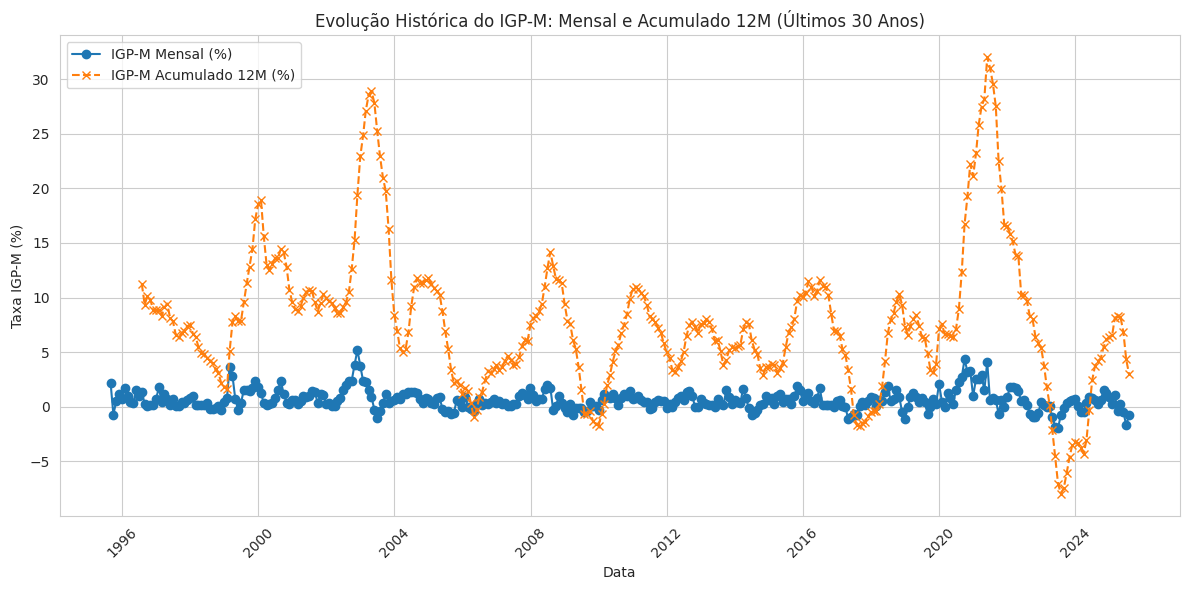

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the monthly IGP-M variation
plt.plot(df_igpm_combined.index, df_igpm_combined.values, marker='o', linestyle='-', label='IGP-M Mensal (%)')

# Plot the 12-month accumulated IGP-M
# Ensure the indices align for plotting
plt.plot(df_igpm_combined_12m.index, df_igpm_combined_12m.values, marker='x', linestyle='--', label='IGP-M Acumulado 12M (%)')


# Add titles and labels
plt.title('Evolução Histórica do IGP-M: Mensal e Acumulado 12M (Últimos 30 Anos)')
plt.xlabel('Data')
plt.ylabel('Taxa IGP-M (%)')

# Add a legend to distinguish the lines
plt.legend()

# Improve date formatting on the x-axis
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()

## Salvar dados em JSON

In [17]:
import json

# Prepare the data for JSON
# The index of df_igpm_combined_12m is the Date, and the values are the 12-month accumulated IGP-M rates.
# We need to convert the index (datetime objects) to string format 'YYYY-MM-DD'.

# Create a list of dictionaries, one for each data point
data_list = []
for index, value in df_igpm_combined_12m.items():
    data_list.append({
        "date": index.strftime('%Y-%m-%d'), # Format date as YYYY-MM-DD
        "rate": value # Use the 12-month accumulated IGP-M rate value
    })

# Create the final dictionary structure
json_output = {
    "indicatorName": "IGP-M Acumulado 12M (%)", # Update the indicator name
    "data": data_list
}

# Define the output file path
output_file_path = 'igpm_acumulado_12m.json' # Change the filename to reflect accumulated data

# Save the dictionary to a JSON file with indentation for readability
with open(output_file_path, 'w') as f:
    json.dump(json_output, f, indent=4)

print(f"Dados do IGP-M acumulado 12M formatados e salvos em '{output_file_path}'")

Dados do IGP-M acumulado 12M formatados e salvos em 'igpm_acumulado_12m.json'
